# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Assignment: Q-Learning

## Learning Objectives

At the end of the experiment, you will be able to:


*  understand the Q-Learning Algorithm implementation

## Introduction

### Q-Learning

Q-learning is an off policy reinforcement learning algorithm that seeks to find the best action to take given the current state. It’s considered off-policy because the q-learning function learns from actions that are outside the current policy, like taking random actions, and therefore a policy isn’t needed. More specifically, q-learning seeks to learn a policy that maximizes the total reward.

The ‘Q’ in Q-learning stands for quality. Quality in this case represents how useful a given action is in gaining some future reward.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2302794" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9008710123" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "AIAS_B2_M4_AST_03_Q_Learning_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://files.grouplens.org/datasets/movielens/ml-25m.zip")
    ipython.magic("sx unzip ml-25m.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aias-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Building AI solution with Q-Learning

Temporal Difference (TD) is the foundation of Q-learning. It is a sum of reward obtained from moving one state to another state and discounting factor times the maximum of Q value of the next state concerning the action and Q value of the current state with its action.

$TD = R(s,a) + \gamma \times maxQ'(s',a') - Q(s,a)$

Update the Q-value of the next corresponding state by the Q value of the previous state and learning rate (alpha) times the temporal difference:

$New\ Q(s,a) = Q(s,a) + \alpha \times TD$

$New\ Q(s,a) = Q(s,a) + \alpha \times [ R(s,a) + \gamma \times maxQ'(s',a') - Q(s,a)]$

where,

Q(s,a) = current Q value

R(s,a) = reward for taking an action (a) in a state (s)

maxQ'(s',a') = maximum expected future reward

New Q(s,a) = new Q value for the state (s) and action (a)

$\alpha$ = learning rate

$\gamma$ = discount factor

Let's see the implementation of Q-Learning with 2 examples:

- Example 1: Finding the shortest route
- Example 2: Self-Driving Cab

### Import required packages

In [4]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
mpl.rc('animation', html='jshtml')
import random
from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

## Example 1: Finding the shortest route

Here, the task is to enable a Robot in finding the shortest route (given the start and end locations) using the Q-Learning algorithm.

<center>
<img src="https://cdn.iisc.talentsprint.com/AIAS/Graph_nodes_data.png" width=400px>
</center>

In above figure, each node represents a location, and each line represents the path joining these locations. Consider the lines are of equal lengths.

Let's see the details of different aspects, such as rewards, states, and actions, that needs to be considered while modeling an RL solution for this problem.

### **States**

There are **6** discrete states representing robot of being at that location

- 0: location A
- 1: location B
- 2: location C
- 3: location D
- 4: location E
- 5: location F

### **Actions**

There are **6** discrete deterministic actions:

- 0: move to location A
- 1: move to location B
- 2: move to location C
- 3: move to location D
- 4: move to location E
- 5: move to location F

### **Rewards**

Assign reward as $+1$ for all the possible moves which robot can move from the given state to another, else $0$.

### Prepare the data

Define the dictionaries of locations mapped to the state indexes.

In [5]:
# Define the states
location_to_state = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5}

# Define the actions
actions = [0, 1, 2, 3, 4, 5]

Create a reward matrix where we assign rewards as one for all the possible moves which robot can move from the given state to another. Otherwise, we assign reward zero.

In [6]:
# Define the reward matrix
Reward_matrix = np.array([[0,1,1,0,1,1],           # possible moves from A to B,C,E,F
                          [1,0,1,0,0,0],           # possible moves from B to A,C
                          [1,1,0,1,1,0],           # possible moves from C to A,B,D,E
                          [0,0,1,0,1,0],           # possible moves from D to C,E
                          [1,0,1,1,0,1],           # possible moves from E to A,C,D,F
                          [1,0,0,0,1,0]])          # possible moves from F to A,E
print(Reward_matrix)

[[0 1 1 0 1 1]
 [1 0 1 0 0 0]
 [1 1 0 1 1 0]
 [0 0 1 0 1 0]
 [1 0 1 1 0 1]
 [1 0 0 0 1 0]]


Create a new dictionary for mapping state indexes to locations which will be used for finding the route using Q-values computation.

In [7]:
# Maps indices to locations
state_to_location = {state:location for location, state in location_to_state.items()}
print(state_to_location)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F'}


### Implement Q-Learning

**Q-learning algorithm:**

- Initialize the Q-table with all zeros
- Start exploring actions: For each state, select any one among all possible/playable actions for the current state (S). Here, Random policy method is used to select action.
- Travel to the next state (S') as a result of that action (a)
- For all possible actions from the state (S') select the one with the highest Q-value
- Update Q-table values using the equation
- Set the next state as the current state
- If goal state is reached, then end and repeat the process

Initialize the parameters

1. Discounting Factor (gamma) is the factor at which the Q-Value gets decremented after each cycle.
2. Learning Rate (alpha) is the rate at which the algorithm learns after each cycle.

In [8]:
# Setting the parameters
gamma = 0.75    # Discount factor
alpha = 0.9     # Learning rate
episodes = 1000

In [9]:
# Making a function that returns the path from a starting to the ending location

def route(starting_location, ending_location, show_Qtable = False):
    # Copy the rewards matrix to new Matrix
    R_new = np.copy(Reward_matrix)

    # Get the indicies of the ending location
    ending_state = location_to_state[ending_location]

    # Set the priority of the given ending state to the highest goal
    R_new[ending_state, ending_state] = 100

    # Initializing Q-Values in Q-table
    Qtable = np.array(np.zeros([6,6]))         # 6 rows for states, and 6 columns for actions

    # Q-Learning process: Exploring actions
    for i in range(episodes):
        # Pick up a state randomly
        current_state = np.random.randint(0,6)

        # For traversing through the neighbor locations
        playable_actions = []

        # Iterate through the new rewards matrix and get the actions > 0
        for j in range(6):
            if R_new[current_state, j] > 0:
                playable_actions.append(j)

        # Pick an action randomly from the list of playable actions and lead to the next state : Random policy
        action = np.random.choice(playable_actions)

        next_state = action                      # Next state we get as a result of the action
        reward = R_new[current_state, action]    # Reward of taking the action

        old_value = Qtable[current_state, action]
        next_max = np.max(Qtable[next_state])

        # Compute the temporal difference. The action here exactly refers to going to the next state
        TD = reward + gamma * next_max - old_value

        # Update the Q-Value using the Bellman equation
        new_value = old_value + alpha * (TD)
        Qtable[current_state, action] = new_value

    # Initialize the optimal route with the starting location
    route = [starting_location]

    # We do not know about the next location yet, so initialize with the value of starting location
    next_location = starting_location

    # Get the route
    while (next_location != ending_location):
        # Fetch the starting state
        starting_state = location_to_state[starting_location]

        # Fetch the highest Q-value pertaining to starting state
        next_state = np.argmax(Qtable[starting_state, :])

        # We got the index of the next state. But we need the corresponding location.
        next_location = state_to_location[next_state]
        route.append(next_location)

        # Update the starting location for the next iteration
        starting_location = next_location

    if show_Qtable:
        print('Q-Table:')
        print(Qtable.round())

    return route


In [10]:
# Get the optimal route
F_to_B = route('F', 'B', show_Qtable = True)
print('Route:')
print(F_to_B)

Q-Table:
[[  0. 301. 227.   0. 171. 171.]
 [227. 400. 227.   0.   0.   0.]
 [227. 301.   0. 171. 171.   0.]
 [  0.   0. 227.   0. 171.   0.]
 [227.   0. 227. 171.   0. 171.]
 [227.   0.   0.   0. 171.   0.]]
Route:
['F', 'A', 'B']


## Example 2: Self-Driving Cab

Here, the task is to teach a Taxi, or Cab, to pick up and drop off passengers at the right locations using the Q-Learning algorithm.

<br>
<center>
<img src="https://cdn.iisc.talentsprint.com/AIAS/smartcab_animation.gif" width=400px>
</center>
<br>

There are four designated locations in the grid world indicated by ***Red***, ***Green***, ***Yellow***, and ***Blue***. When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger's location, picks up the passenger, drives to the passenger's destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.

Here are a few things that it needs to take care of:

- Drop off the passenger to the right location
- Save passenger's time by taking minimum time possible to drop off
- Take care of passenger's safety and drive only on the road

Let's see the details of different aspects, such as rewards, states, and actions, that needs to be considered while modeling an RL solution for this problem.

### **Actions**

There are **6** discrete deterministic actions:

- 0: move south
- 1: move north
- 2: move east
- 3: move west
- 4: pickup passenger
- 5: drop off passenger

### **States** (Observations)

There are **500** discrete states

$ = 25$ (taxi positions) $\times 5$ (possible passenger locations) $\times 4$ (destination locations)

<br>

Taxi positions: (25)

$\quad\quad$<img src="https://cdn.iisc.talentsprint.com/AIAS/Taxi_location.png" width=300px>


Passenger locations: (5)

- 0: R(red)
- 1: G(green)
- 2: Y(yellow)
- 3: B(blue)
- 4: in taxi

Destinations: (4)

- 0: R(red)
- 1: G(green)
- 2: Y(yellow)
- 3: B(blue)

<br>

Each of these 500 states are represented by tuples of: (taxi_row, taxi_col, passenger_location, destination).

### **Rewards**

Few points to consider for rewards allocation:

- The agent should receive a high positive reward for a successful dropoff because this behavior is highly desired

- The agent should be penalized if it tries to drop off a passenger in wrong locations

- The agent should get a slight negative reward for not making it to the destination after every time-step. "Slight" negative because it would be prefered to reach late instead of making wrong moves trying to reach to the destination as fast as possible

Based on above points, the rewards are as follows:

- $+20$ delivering passenger
- $-10$ executing “pickup” and “drop-off” actions illegally
- $-1$ per step unless other reward is triggered

### Create Environment

An environment can be created using `gym.make()` function. After the environment is created, it must be initialized using the `reset()` method. This returns the first observation/state. Observations depend on the type of environment.

In [11]:
# Create Taxi environment
env = gym.make("Taxi-v3", render_mode="single_rgb_array")

# Set seed for reproducibility
env.seed(42)
np.random.seed(42)

state_ = env.reset()
state_

386

In case of taxi environment, the state is an integer (0 - 499) that encodes the corresponding state space represented by tuple: (taxi_row, taxi_col, passenger_location, destination).

The state tuple can be decoded with the `decode` method.

In [12]:
# Decode state
tuple(env.decode(state_))      # (taxi row, taxi column, passenger index, destination index)

(3, 4, 1, 2)

Let's create a function to visualize the environment.

In [13]:
# Create a function to plot environment

def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render( )              # render() will render the frame/snapshot of environment in current state.
                                     # We want render() to return the rendered image as a NumPy array, that's why
                                     # we set render_mode="single_rgb_array" while instantiating the environment
    plt.imshow(img)
    plt.axis("off")
    return img

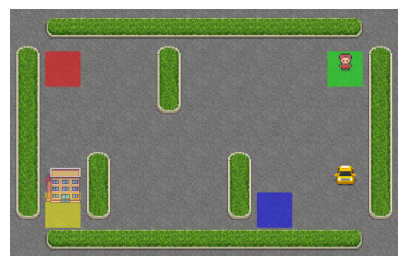

In [14]:
plot_environment(env)
plt.show()

The above decoded state can be visualized in above plot.

In [15]:
# Action and State spaces
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


### Implement Q-Learning

**Q-learning algorithm:**

- Initialize the Q-table with all zeros
- Start exploring actions: For each state, select any one among all possible actions for the current state (S). Methods such as Greedy policy, or Epsilon($\epsilon$)-greedy policy can be used to select action.
- Travel to the next state (S') as a result of that action (a)
- For all possible actions from the state (S') select the one with the highest Q-value
- Update Q-table values using the equation
- Set the next state as the current state
- If goal state is reached, then end and repeat the process

In [16]:
# The Q-table is a matrix where we have a row for every state (500) and a column for every action (6).
# It's first initialized to 0, and then values are updated after training.

q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table.shape

(500, 6)

Let's now create the training algorithm that will update this Q-table as the agent explores the environment over thousands of episodes.

In [17]:
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1
episodes = 100000

# For plotting metrics
all_epochs = []
all_penalties = []


# Update Q-Table

for i in range(1, episodes + 1):
    # Initial state and reward
    state = env.reset()
    reward = 0
    done = False

    epochs, penalties = 0, 0

    while not done:

        # Using epsilon-greedy policy for selecting the next action to take
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()   # Explore action space
        else:
            action = np.argmax(q_table[state])   # Exploit learned values

        # Take action on environment, and get reward and next-state
        next_state, reward, done, info = env.step(action)

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        # Compute the temporal difference
        TD = reward + gamma * next_max - old_value

        # Update the Q-Value using the Bellman equation
        new_value = old_value + alpha * (TD)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1

    all_epochs.append(epochs)
    all_penalties.append(penalties)

    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.



Now that the Q-table has been established over 100,000 episodes, let's see what the Q-values are at the state illustrated earlier:

In [18]:
q_table[state_]

array([ -2.48019145,  -2.4510224 ,  -2.46342623,  -2.47803842,
       -10.62023792, -10.83738954])

The max Q-value is "north" (at index 1), so it looks like Q-learning has effectively learned the best action to take for the state illustrated earlier.

#### Plot metrics

In [19]:
len(all_epochs), len(all_penalties)

(100000, 100000)

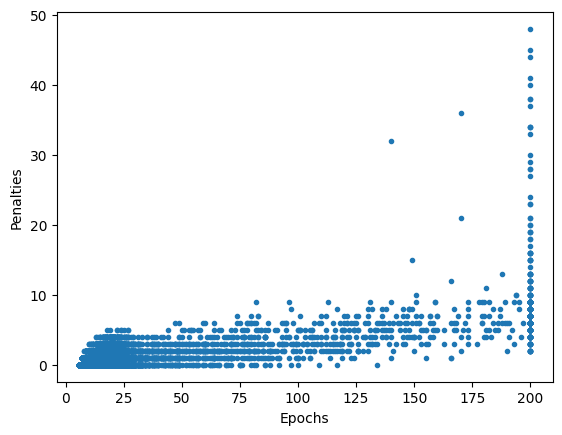

In [20]:
plt.plot(all_epochs, all_penalties, '.')
plt.xlabel("Epochs")
plt.ylabel("Penalties")
plt.show()

From the above plot, it can be seen that most of the episodes were solved within 50 timesteps/epochs, and the episodes who went upto 200 timesteps has acquired high penalties.

### Visualize performance

To evaluate agent's performance after Q-learning, let's create a function that will return the frames/snapshots of the enviorment as the agent progresses. Also, create functions that will use these frames to create an overall animation.

In [21]:
# Create function to return frames for animation

def render_frames_q_learning(q_table, seed=42):
    frames = []
    env = gym.make("Taxi-v3", render_mode="single_rgb_array").env
    env.seed(seed)
    np.random.seed(seed)
    state = env.reset()
    done = False

    while not done:
        img = env.render()
        frames.append(img)
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

    env.close()
    return frames

In [22]:
# Create functions to plot animation

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(fig, update_scene, fargs=(frames, patch),
                                   frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [23]:
# Visualize animation
frames = render_frames_q_learning(q_table, seed=123)     # change the seed value to check performance on different initial states
plot_animation(frames)

Output hidden; open in https://colab.research.google.com to view.

Play the above animation to see the agent's progress.

### Please answer the questions below to complete the experiment:


In [24]:
# @title In Q-learning, what does the epsilon-greedy strategy contribute to the learning process?  { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "Balancing exploration and exploitation" #@param ["","Maximizing exploration","Prioritizing exploitation", "Balancing exploration and exploitation","Ignoring exploration for exploitation gains"]

In [25]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "good and challenging" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 924
Date of submission:  24 Nov 2023
Time of submission:  10:23:08
View your submissions: https://mlaias-iisc.talentsprint.com/notebook_submissions
